# 16IT135 &emsp; &emsp;  &emsp;  &emsp;  &emsp;  &emsp;    IT441: Data Science

## **Practical 1 : Data Scraping using Python**

## **Theory :**

> There are several ways to extract information from the web. Use of APIs being probably the best way to extract data from a website. Almost all large websites like Twitter, Facebook, Google, Twitter, StackOverflow provide APIs to access their data in a more structured manner. If you can get what you need through an API, it is almost always preferred approach over web scraping. Sadly, not all websites provide an API. Some do it because they do not want the readers to extract huge information in a structured way, while others don’t provide APIs due to lack of technical knowledge. What do you do in these cases? Well, we need to scrape the website to fetch the information.

**What is Web Scraping?**

> Web scraping is a computer software technique of extracting information from websites. This technique mostly focuses on the transformation of unstructured data (HTML format) on the web into structured data (database or spreadsheet).

**Libraries required for Web Scraping**


> *   **Urllib2:** It is a Python module which can be used for fetching URLs.
*   **BeautifulSoup:** It is an incredible tool for pulling out information from a webpage. You can use it to extract tables, lists, paragraph and you can also put filters to extract information from web pages. 







In [0]:
#To import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#The urllib.request module is used to open URLs.
from urllib.request import urlopen

#The Beautiful Soup package is used to extract data from html files.The Beautiful Soup library's name is bs4 which stands for Beautiful Soup, version 4.
from bs4 import BeautifulSoup

In [0]:
#urlopen() is used to get the html of the page.
url = "https://www.hubertiming.com/results/2015TWH"
html = urlopen(url)

In [0]:
#The Beautiful Soup package is used to parse the html, that is, take the raw html text and break it into Python objects. 
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [0]:
# To print the title of the website
title = soup.title
print(title)

<title>2015 Twilight Half Marathon Race Results</title>


In [0]:
# Print out the text of the webpage
text = soup.get_text()
#print(soup.text)

In [0]:
#To print all the links of the webpage
all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

mailto:timing@hubertiming.com
https://www.hubertiming.com/
/results/2015TWH10K
/results/2015TWH5K
/results/summary/2015TWH
#tabs-1
None
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [0]:
# Print the first 5 rows
rows = soup.find_all('tr')
print(rows[:5])

[<tr colspan="2"><b>Half Marathon:</b></tr>, <tr><td>Finishers:</td><td>334</td></tr>, <tr><td>Male:</td><td>118</td></tr>, <tr><td>Female:</td><td>216</td></tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>Age</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
</tr>]


In [0]:
#To print table data 
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>334</td>, <td>290</td>, <td>LEAH SCOTT</td>, <td>F</td>, <td>38</td>, <td>VANCOUVER</td>, <td>WA</td>, <td>3:57:15</td>, <td>18:06</td>, <td>216 of 216</td>, <td>F 35-39</td>, <td>36 of 36</td>, <td>0:41</td>, <td>3:57:56</td>]


bs4.element.ResultSet

In [0]:
# The get_text() method is used to extract the text without html tags.
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, "lxml").get_text()
print(cleantext)

[334, 290, LEAH SCOTT, F, 38, VANCOUVER, WA, 3:57:15, 18:06, 216 of 216, F 35-39, 36 of 36, 0:41, 3:57:56]


In [0]:
#The code below shows how to build a regular expression that finds all the characters inside the < td > html tags and replace them with an empty string for each table row.
# The full code below generates an empty list, extract text in between html tags for each row, and append it to the assigned list.
import re

list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>') # compile a regular expression by passing a string to match to re.compile().
    clean2 = (re.sub(clean, '',str_cells)) # The re.sub() method to find all the substrings where the regular expression matches and replace them with an empty string.
    list_rows.append(clean2)
print(clean2)
type(clean2)

[334, 290, LEAH SCOTT, F, 38, VANCOUVER, WA, 3:57:15, 18:06, 216 of 216, F 35-39, 36 of 36, 0:41, 3:57:56]


str

In [0]:
# To convert the list into a dataframe and get a quick view of the first 10 rows using Pandas.
df = pd.DataFrame(list_rows)
df.head(10)

,0
0,[]
1,"[Finishers:, 334]"
2,"[Male:, 118]"
3,"[Female:, 216]"
4,[]
5,"[1, 281, TRAVIS MITCHELL, M, 26, PORTLAND, OR,..."
6,"[2, 203, MARK BOWLES, M, 36, NEW YORK, NY, 1:2..."
7,"[3, 47, MICHAEL ALLEN, M, 42, HILLSBORO, OR, 1..."
8,"[4, 168, WESLEY CHAN, M, 24, PORTLAND, OR, 1:3..."
9,"[5, 381, STEVEN AMBO, M, 24, PORTLAND, OR, 1:3..."


In [0]:
df1 = df[0].str.split(',', expand=True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[],None,None,None,None,None,None,None,None,None,None,None,None,None
1,[Finishers:,334],None,None,None,None,None,None,None,None,None,None,None,None
2,[Male:,118],None,None,None,None,None,None,None,None,None,None,None,None
3,[Female:,216],None,None,None,None,None,None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None,None,None,None,None,None
5,[1,281,TRAVIS MITCHELL,M,26,PORTLAND,OR,1:20:09,6:07,1 of 118,M 25-29,1 of 17,0:02,1:20:11]
6,[2,203,MARK BOWLES,M,36,NEW YORK,NY,1:29:29,6:49,2 of 118,M 35-39,1 of 24,0:04,1:29:33]
7,[3,47,MICHAEL ALLEN,M,42,HILLSBORO,OR,1:30:53,6:56,3 of 118,M 40-44,1 of 14,0:02,1:30:55]
8,[4,168,WESLEY CHAN,M,24,PORTLAND,OR,1:32:53,7:05,4 of 118,M 20-24,1 of 6,0:06,1:32:59]
9,[5,381,STEVEN AMBO,M,24,PORTLAND,OR,1:33:37,7:08,5 of 118,M 20-24,2 of 6,0:06,1:33:43]


In [0]:
# You can use the strip() method to remove the opening square bracket on column "0."
df1[0] = df1[0].str.strip('[')
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,334],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,118],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,216],None,None,None,None,None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None,None,None,None,None
5,1,281,TRAVIS MITCHELL,M,26,PORTLAND,OR,1:20:09,6:07,1 of 118,M 25-29,1 of 17,0:02,1:20:11]
6,2,203,MARK BOWLES,M,36,NEW YORK,NY,1:29:29,6:49,2 of 118,M 35-39,1 of 24,0:04,1:29:33]
7,3,47,MICHAEL ALLEN,M,42,HILLSBORO,OR,1:30:53,6:56,3 of 118,M 40-44,1 of 14,0:02,1:30:55]
8,4,168,WESLEY CHAN,M,24,PORTLAND,OR,1:32:53,7:05,4 of 118,M 20-24,1 of 6,0:06,1:32:59]
9,5,381,STEVEN AMBO,M,24,PORTLAND,OR,1:33:37,7:08,5 of 118,M 20-24,2 of 6,0:06,1:33:43]


In [0]:
# The table is missing table headers. The find_all() method is used to get the table headers.
col_labels = soup.find_all('th')

In [0]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, "lxml").get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, Age, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time]']


In [0]:
# To convert list of headers to dataframe.
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, Age, City, State, C..."


In [0]:
# To split column "0" into multiple columns at the comma position for all rows.
df3 = df2[0].str.split(',', expand=True)
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time]


In [0]:
# The two dataframes can be concatenated into one using the concat() method
frames = [df3, df1]

df4 = pd.concat(frames)
df4.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time]
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,334],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,118],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,216],None,None,None,None,None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None,None,None,None,None
5,1,281,TRAVIS MITCHELL,M,26,PORTLAND,OR,1:20:09,6:07,1 of 118,M 25-29,1 of 17,0:02,1:20:11]
6,2,203,MARK BOWLES,M,36,NEW YORK,NY,1:29:29,6:49,2 of 118,M 35-39,1 of 24,0:04,1:29:33]
7,3,47,MICHAEL ALLEN,M,42,HILLSBORO,OR,1:30:53,6:56,3 of 118,M 40-44,1 of 14,0:02,1:30:55]
8,4,168,WESLEY CHAN,M,24,PORTLAND,OR,1:32:53,7:05,4 of 118,M 20-24,1 of 6,0:06,1:32:59]


In [0]:
# To assign the first row to be the table header.
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time]
0,[Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time]
0,],None,None,None,None,None,None,None,None,None,None,None,None,None
1,Finishers:,334],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,118],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,216],None,None,None,None,None,None,None,None,None,None,None,None


In [0]:
# To get the overview of the data
df5.info()
df5.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 338
Data columns (total 14 columns):
[Place              340 non-null object
 Bib                338 non-null object
 Name               335 non-null object
 Gender             335 non-null object
 Age                335 non-null object
 City               335 non-null object
 State              335 non-null object
 Chip Time          335 non-null object
 Chip Pace          335 non-null object
 Gender Place       335 non-null object
 Age Group          335 non-null object
 Age Group Place    335 non-null object
 Time to Start      335 non-null object
 Gun Time]          335 non-null object
dtypes: object(14)
memory usage: 39.8+ KB


(340, 14)

In [0]:
# To drop all rows with any missing values.
df6 = df5.dropna(axis=0, how='any')

In [0]:
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time]
5,1,281,TRAVIS MITCHELL,M,26,PORTLAND,OR,1:20:09,6:07,1 of 118,M 25-29,1 of 17,0:02,1:20:11]
6,2,203,MARK BOWLES,M,36,NEW YORK,NY,1:29:29,6:49,2 of 118,M 35-39,1 of 24,0:04,1:29:33]
7,3,47,MICHAEL ALLEN,M,42,HILLSBORO,OR,1:30:53,6:56,3 of 118,M 40-44,1 of 14,0:02,1:30:55]
8,4,168,WESLEY CHAN,M,24,PORTLAND,OR,1:32:53,7:05,4 of 118,M 20-24,1 of 6,0:06,1:32:59]
9,5,381,STEVEN AMBO,M,24,PORTLAND,OR,1:33:37,7:08,5 of 118,M 20-24,2 of 6,0:06,1:33:43]


In [0]:
# Data Cleaning
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Gun Time]': 'Gun Time'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
5,1,281,TRAVIS MITCHELL,M,26,PORTLAND,OR,1:20:09,6:07,1 of 118,M 25-29,1 of 17,0:02,1:20:11]
6,2,203,MARK BOWLES,M,36,NEW YORK,NY,1:29:29,6:49,2 of 118,M 35-39,1 of 24,0:04,1:29:33]
7,3,47,MICHAEL ALLEN,M,42,HILLSBORO,OR,1:30:53,6:56,3 of 118,M 40-44,1 of 14,0:02,1:30:55]
8,4,168,WESLEY CHAN,M,24,PORTLAND,OR,1:32:53,7:05,4 of 118,M 20-24,1 of 6,0:06,1:32:59]
9,5,381,STEVEN AMBO,M,24,PORTLAND,OR,1:33:37,7:08,5 of 118,M 20-24,2 of 6,0:06,1:33:43]


In [0]:
# Data Cleaning
df7['Gun Time'] = df7['Gun Time'].str.strip(']')
df7.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
5,1,281,TRAVIS MITCHELL,M,26,PORTLAND,OR,1:20:09,6:07,1 of 118,M 25-29,1 of 17,0:02,1:20:11
6,2,203,MARK BOWLES,M,36,NEW YORK,NY,1:29:29,6:49,2 of 118,M 35-39,1 of 24,0:04,1:29:33
7,3,47,MICHAEL ALLEN,M,42,HILLSBORO,OR,1:30:53,6:56,3 of 118,M 40-44,1 of 14,0:02,1:30:55
8,4,168,WESLEY CHAN,M,24,PORTLAND,OR,1:32:53,7:05,4 of 118,M 20-24,1 of 6,0:06,1:32:59
9,5,381,STEVEN AMBO,M,24,PORTLAND,OR,1:33:37,7:08,5 of 118,M 20-24,2 of 6,0:06,1:33:43


In [0]:
time_list = df7[' Chip Time'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in time_list:
    h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)
#print(time_mins)

In [0]:
# To convert the list back into a dataframe and make a new column ("Runner_mins") for runner chip times expressed in just minutes.
df7['Runner_mins'] = time_mins
df7.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Runner_mins
5,1,281,TRAVIS MITCHELL,M,26,PORTLAND,OR,1:20:09,6:07,1 of 118,M 25-29,1 of 17,0:02,1:20:11,80.150000
6,2,203,MARK BOWLES,M,36,NEW YORK,NY,1:29:29,6:49,2 of 118,M 35-39,1 of 24,0:04,1:29:33,89.483333
7,3,47,MICHAEL ALLEN,M,42,HILLSBORO,OR,1:30:53,6:56,3 of 118,M 40-44,1 of 14,0:02,1:30:55,90.883333
8,4,168,WESLEY CHAN,M,24,PORTLAND,OR,1:32:53,7:05,4 of 118,M 20-24,1 of 6,0:06,1:32:59,92.883333
9,5,381,STEVEN AMBO,M,24,PORTLAND,OR,1:33:37,7:08,5 of 118,M 20-24,2 of 6,0:06,1:33:43,93.616667


In [0]:
# To calculate statistics for numeric columns only in the dataframe.
df7.describe(include=[np.number])

,Runner_mins
count,334.000000
mean,139.373703
std,26.741933
min,80.150000
25%,118.712500
50%,135.900000
75%,156.800000
max,237.250000


In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

([<matplotlib.axis.XTick at 0x7f7f848c3630>],
 <a list of 1 Text xticklabel objects>)

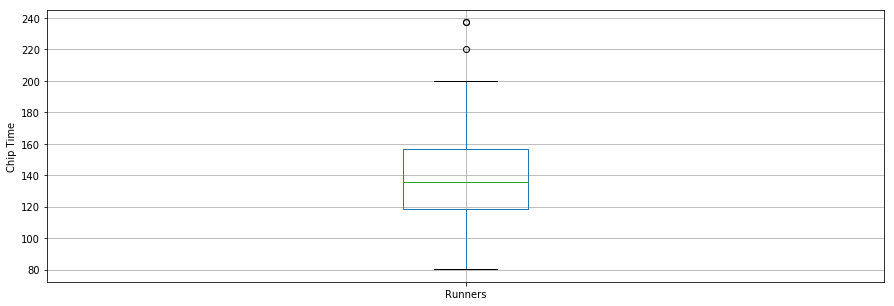

In [0]:
df7.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

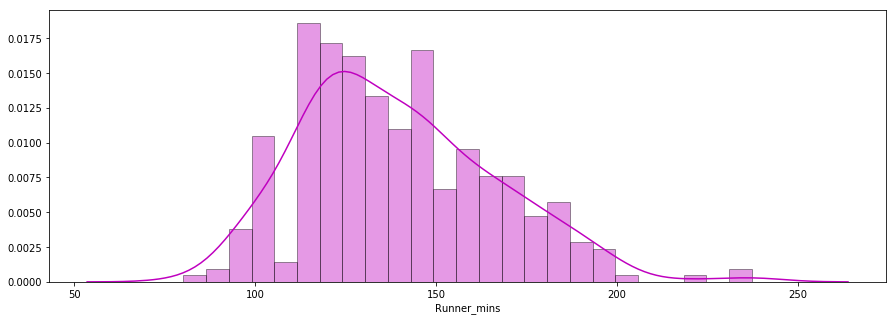

In [0]:
# A distribution plot of runners' chip times plotted using the seaborn library
x = df7['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

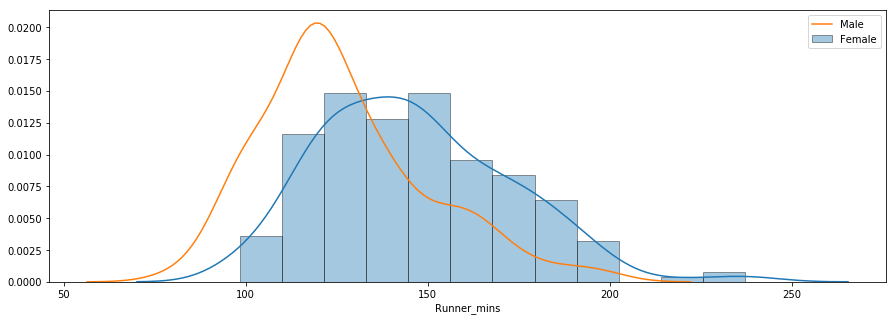

In [0]:
# A distribution plot of chip times for males and females.
f_fuko = df7.loc[df7[' Gender']==' F']['Runner_mins']
m_fuko = df7.loc[df7[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

In [0]:
# groupby() method is used to compute summary statistics for males and females
g_stats = df7.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                         ...                                    
              count        mean        std  ...         50%         75%         max
 Gender                                     ...                                    
 F            216.0  146.301389  26.047435  ...  144.725000  163.391667  237.250000
 M            118.0  126.692514  23.191045  ...  121.691667  139.041667  198.483333

[2 rows x 8 columns]


Text(0.5, 0.98, '')

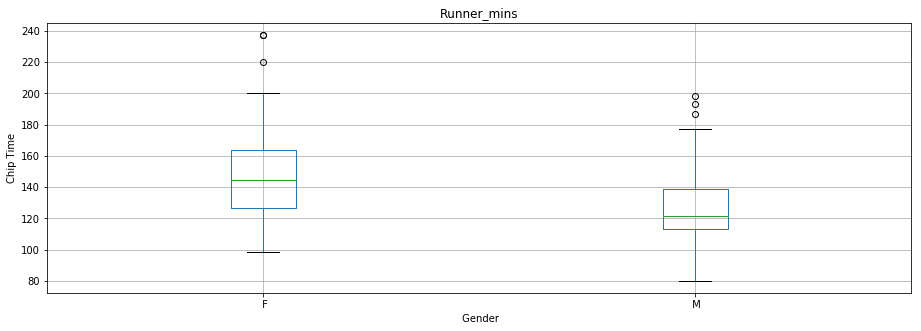

In [0]:
# Side-by-side boxplot comparison of male and female finish times
df7.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")

**Conclusion :** In this practical, I've performed web scraping using Python by using Beautiful Soup library to parse html data and convert it into a form that can be used for analysis.